In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
from segmentation import castClrs, extractConnComp
from scipy.ndimage.filters import gaussian_filter
from skimage import color
from skimage import feature

Originalbild:


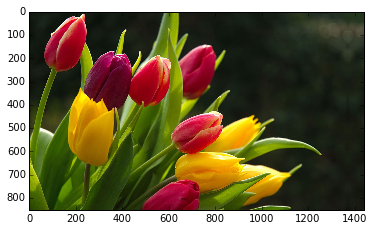

Gaussfilter->Farbraumsegmentiert:


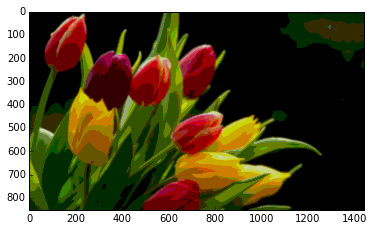

Computation time for colorspace segmentation:0.685954477755s

Zusammenhangskomponenten im Orts- und Farbraum:
Verschiedene Farben aus Farbraumsegmentierung: 61
Anzahl Zusammenhangskomponenten: 1013


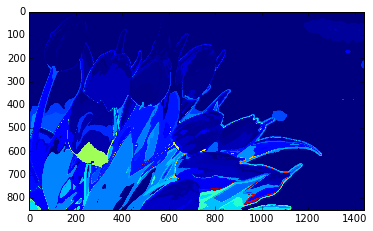

Computation time for connected component segmentation: 2.45198628191s
Number of different colors from colorspace segmentation: 61
Number of connected components:1013



In [8]:
image = misc.imread('flower.jpg')

"""
# Image->castClrs
segmentObj = castClrs(image)
segmentObj.segment(segC0=4, segC1=4, segC2=4, clrs='rgb', mode='mean')
segmentObj.showRGB()
"""

#Image->Gaussfilter
sigma = 3
filterImage = image.copy()
filterImage[:,:,0] = gaussian_filter(image[:,:,0], sigma)
filterImage[:,:,1] = gaussian_filter(image[:,:,1], sigma)
filterImage[:,:,2] = gaussian_filter(image[:,:,2], sigma)

print('Originalbild:')
plt.imshow(image)
plt.show()

# Image->Gaussfilter->castClrs
segmentObj2 = castClrs(filterImage)
segmentObj2.segment(segC0=5, segC1=6, segC2=4, clrs='rgb', mode='floor')
print('Gaussfilter->Farbraumsegmentiert:')
segmentObj2.showRGB()
segmentObj2.showInfo()

connComp = extractConnComp(segmentObj2.RGBSegment())
print('Zusammenhangskomponenten im Orts- und Farbraum:')
connComp.showConnComp()
connComp.showInfo()
